# **Desafio Prático Smarkio**

*   Autor: Maikon Gonçalves Pinto
*   Data: 03 de Março de 2021

Para executar corretamente este notebook, é necessário importar o arquivo **teste_smarkio_lbs.xls**

Importação das bibliotecas utilizadas na resolução de todos os exercícios

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import random
import string
import math
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Questão 1

In [2]:
#Leitura do arquivo excel
ml_df = pd.read_excel('teste_smarkio_lbs.xls', sheet_name="Análise_ML")
#Cópia do dataframe para resolução da questão 1
q1_df = ml_df.copy(deep=True)
#Exibindo os 5 primeiros registros
q1_df.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


In [3]:
#Informações básicas do dataset (média, dv)
q1_df.describe()

,Pred_class,probabilidade,True_class
count,643.000000,643.000000,181.000000
mean,52.712286,0.622436,38.574586
std,37.602068,0.266811,39.581017
min,2.000000,0.043858,0.000000
25%,12.000000,0.408017,0.000000
50%,59.000000,0.616809,24.000000
75%,81.000000,0.870083,74.000000
max,118.000000,1.000000,117.000000


In [4]:
#Verificando qual o tipo das colunas
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


In [5]:
#Verificando as colunas com valores nulos
q1_df.isnull().sum()

Pred_class         0
probabilidade      0
status             0
True_class       462
dtype: int64

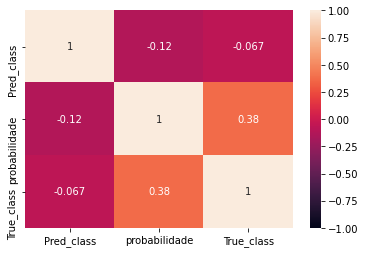

In [6]:
#Verificando se as features tem correlação
sns.heatmap(q1_df.corr(), vmin=-1, vmax=1, annot=True)
sns.set(font_scale=1.0)

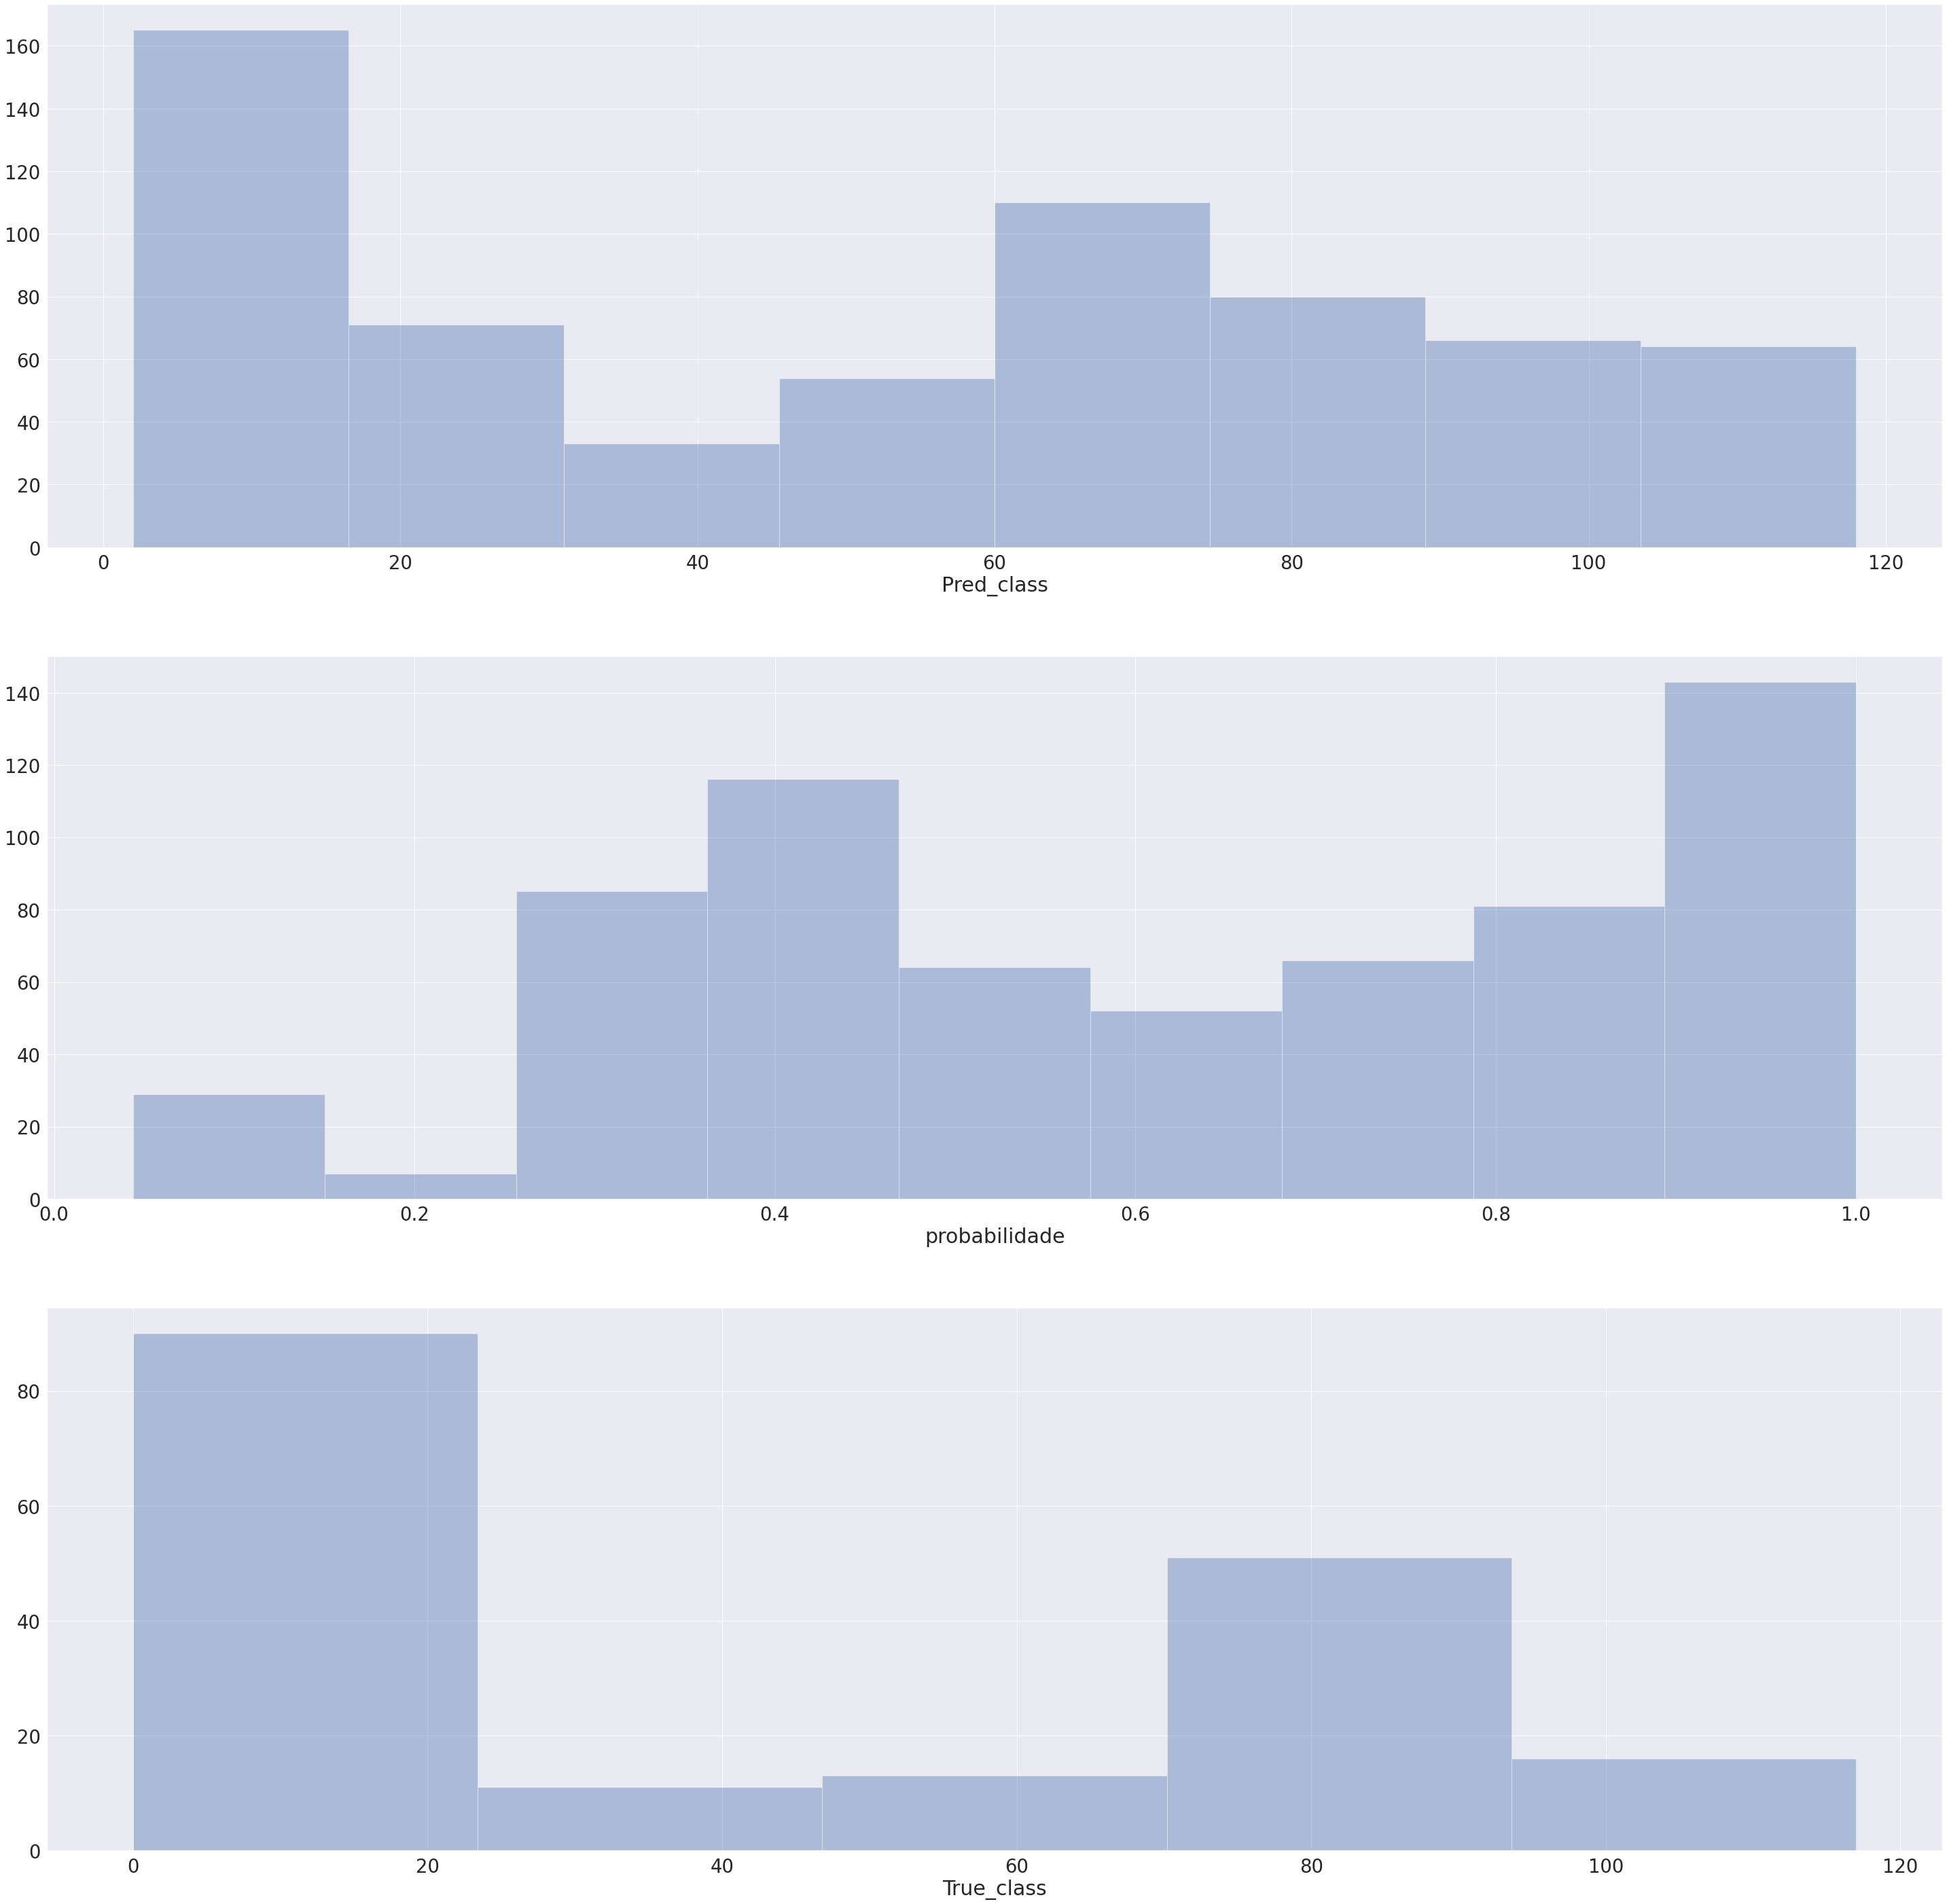

In [8]:
#Verificando a distribuição das amostras
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(50,50)) 
sns.distplot(q1_df["Pred_class"], kde=False, ax=axs[0])
sns.distplot(q1_df["probabilidade"], kde=False, ax=axs[1])
sns.distplot(q1_df["True_class"], kde=False, ax=axs[2])
sns.set(font_scale=2.5)

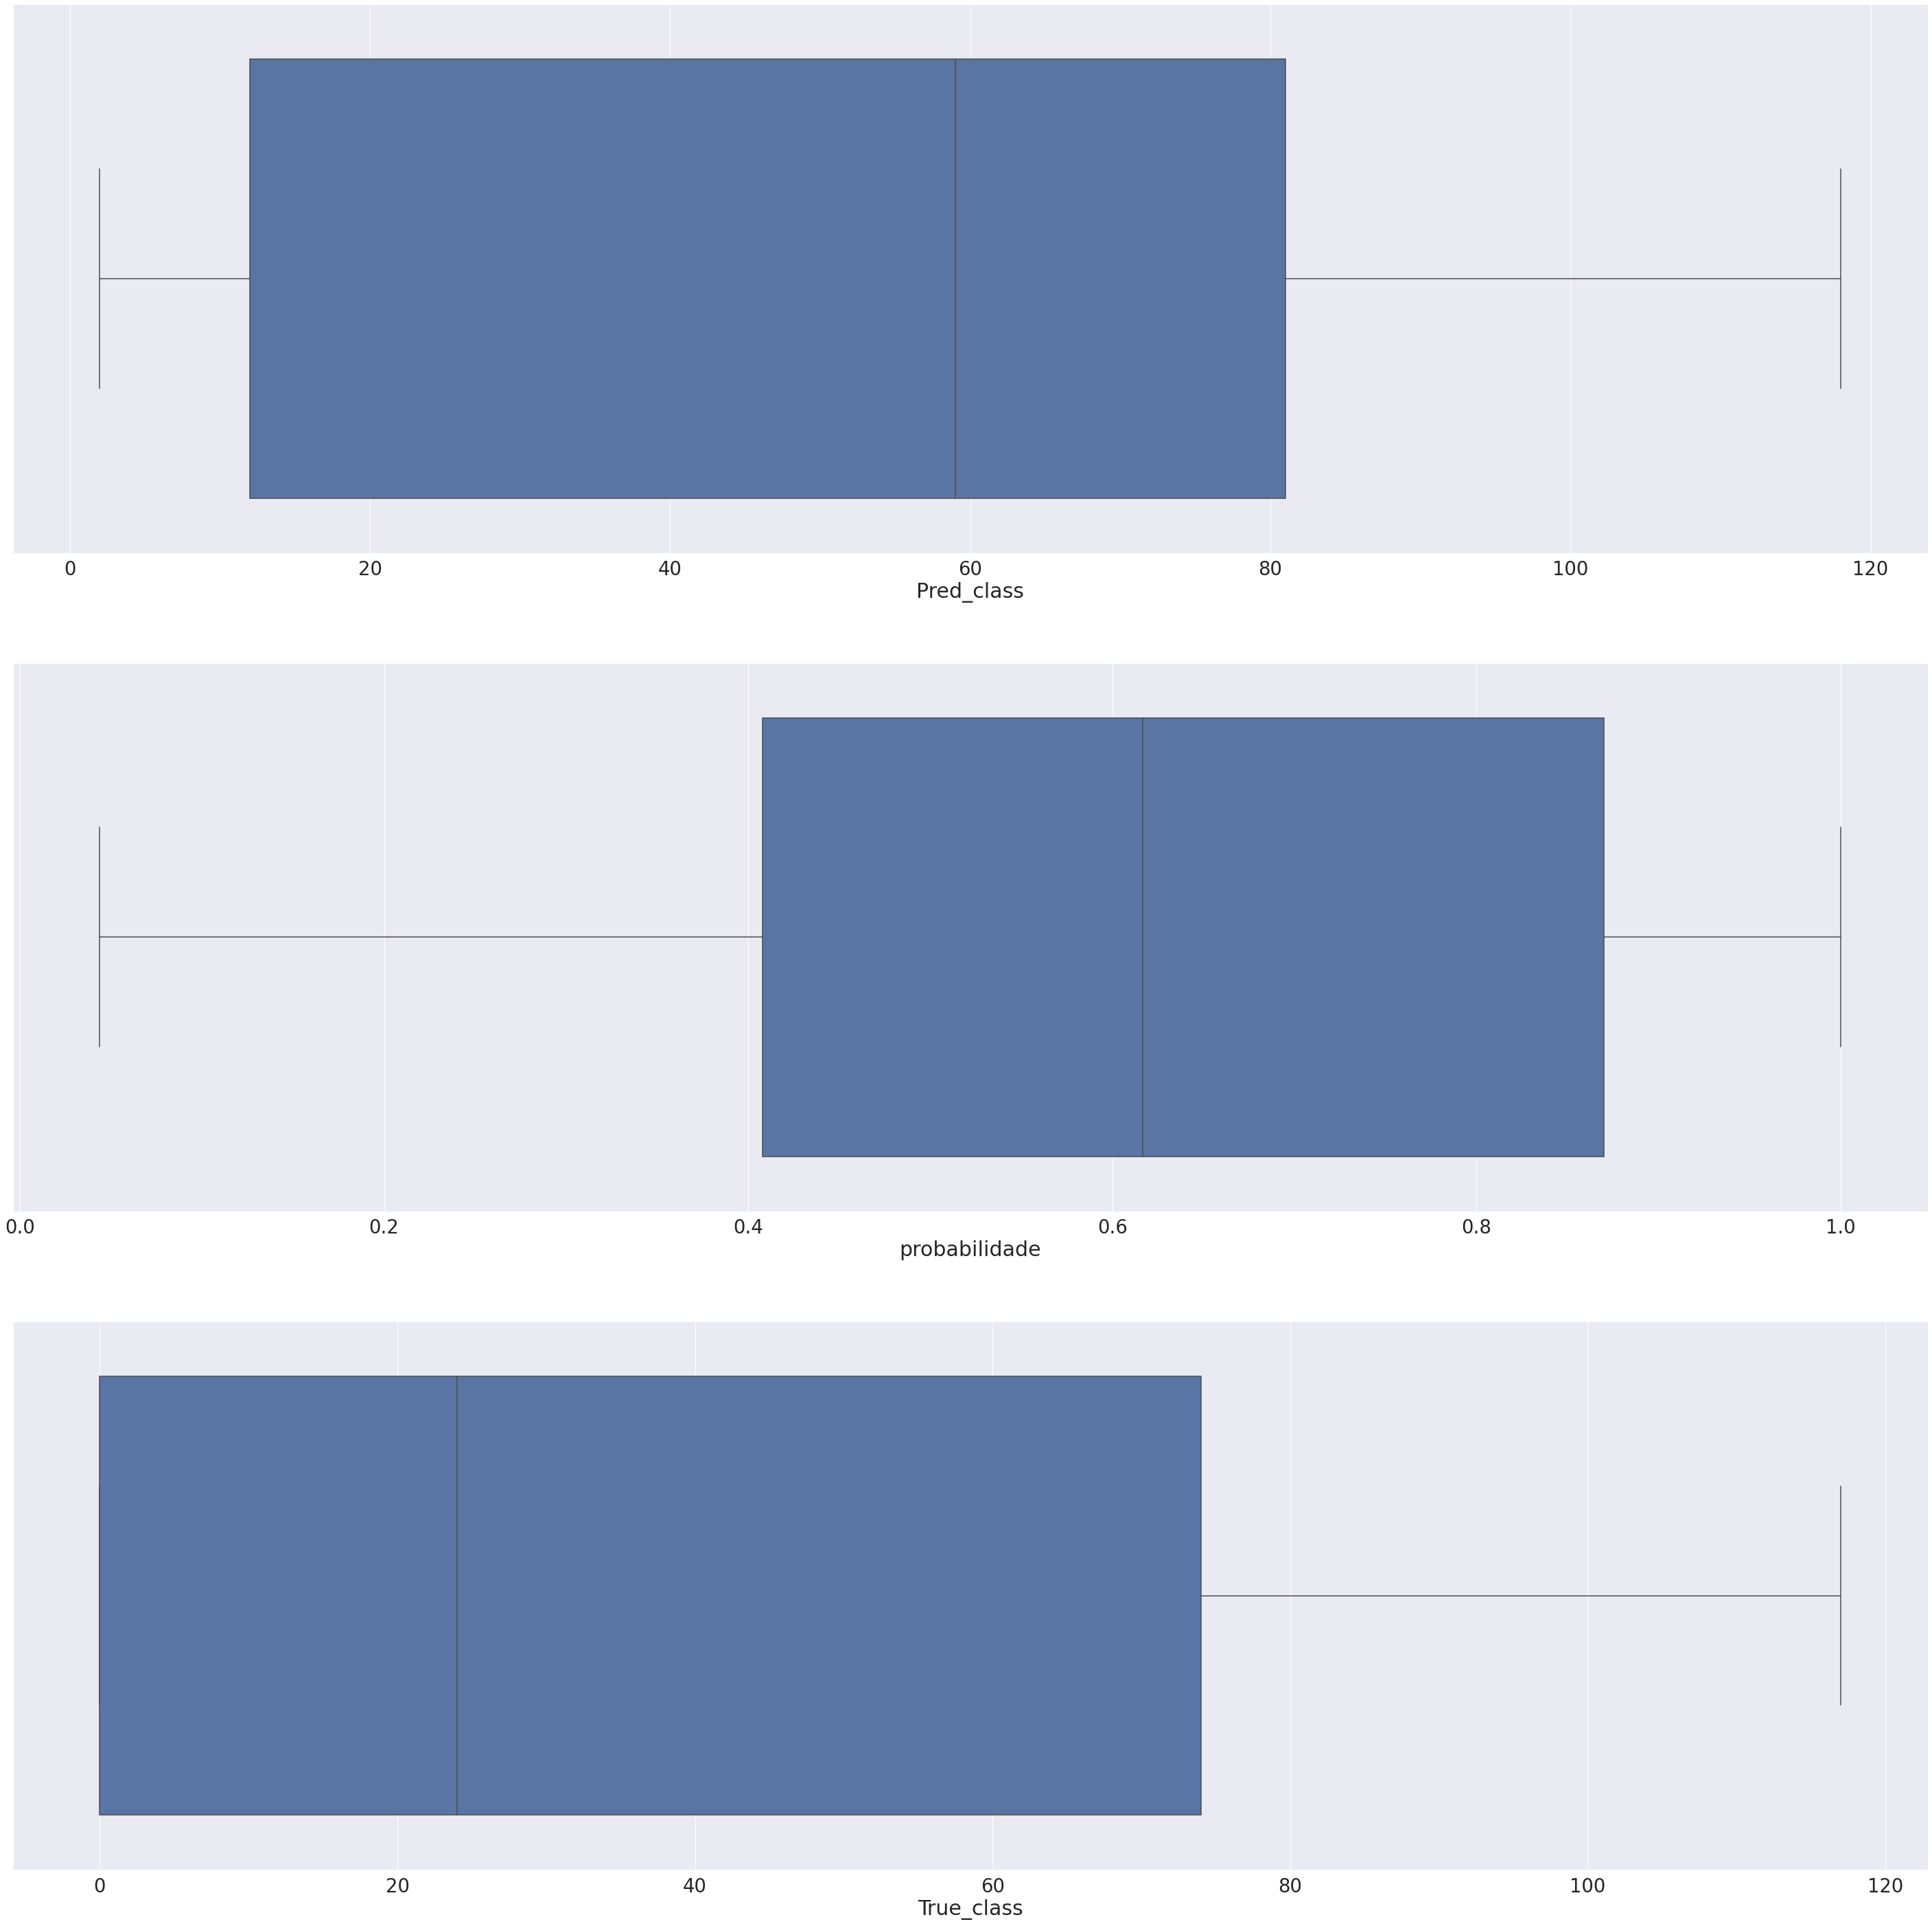

In [9]:
#Verificando a dispersão das amostras e os outliers
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(50,50)) 
sns.boxplot(x=q1_df["Pred_class"], ax=axs[0])
sns.boxplot(x=q1_df["probabilidade"], ax=axs[1])
sns.boxplot(x=q1_df["True_class"], ax=axs[2])
sns.set(font_scale=2.5)

Analisando os dados sem ajustá-los, é possivel perceber que:  

1. Existe uma grande quantidade de amostras com o valor de True_class como NaN.
2. Não há correlação linear entre as variáveis.
1. Considerando a variável Pred_class, as amostras estão bastante dispersas.
1. As amostras não possuem outliers.

# Questão 2 

2.1 No primeiro momento, as métricas de avaliação serão aplicadas c/ a base de dados sem os valores nulos na coluna True_class. Eles serão removidos, e não ajustados conforme o descritivo da questão, isto nos permitirá avaliar o que o modelo realmente previu corretamente.

In [10]:
#Cópia do dataframe para resolução da questão 2
q2_df = ml_df.copy(deep=True)

#Remoção dos NaN na coluna True_class
q2_df.dropna(inplace=True)

#Convertendo a coluna True_class para int
q2_df["True_class"] = q2_df["True_class"].astype(int)

# Acurácia do modelo
y_pred = q2_df["Pred_class"]
y_true = q2_df["True_class"]
print("Acurácia do modelo: {:.2f}".format(accuracy_score(y_true, y_pred)))

Acurácia do modelo: 0.00


2.2 Como vimos na seção anterior a acurácia do modelo é zero, ou seja, **o modelo não teve nenhum acerto**. Sendo assim, faremos o ajuste na coluna True_class conforme o descritivo da questão.

In [11]:
#Copiando novamente o dataframe para resolução da questão 2
q2_df = ml_df.copy(deep=True)

In [13]:
def update_true_class(x, y):
  if math.isnan(x):
    return y
  return x  

In [14]:
#Atribuindo o valor de Pred_class as linhas com NaN na coluna True_class
q2_df["True_class"] = q2_df.apply(lambda x: update_true_class(x.True_class, x.Pred_class), axis=1)

#Convertendo a coluna True_class para int
q2_df["True_class"] = q2_df["True_class"].astype(int)

In [15]:
# Acurácia do modelo
y_pred = q2_df["Pred_class"]
y_true = q2_df["True_class"]
print("Acurácia do modelo: {:.2f}".format(accuracy_score(y_true, y_pred)))

Acurácia do modelo: 0.72


2.3 A acurácia do modelo passou para **72%**. Vamos para mais três métricas:

*   Average Precision Score
*   Average Recall Score
*   Average F1 score

In [16]:
print("Average Precision Score: {:.2f}".format(precision_score(y_true, y_pred, average="macro")))
print("Average Recall Score: {:.2f}".format(recall_score(y_true, y_pred, average="macro")))
print("Average F1 Score: {:.2f}".format(f1_score(y_true, y_pred, average="macro")))

Average Precision Score: 0.63
Average Recall Score: 0.70
Average F1 Score: 0.64


# Questão 3

3.1 Para respondermos esta questão, primeiro precisamos definir quais são os critérios para que as amostras com o status igual a **revision** sejam consideradas corretas:

Corretas: amostras com o valor de Pred_class diferente de True_class.

Não corretas:  amostras com o valor de Pred_class igual a True_class.

Amostras com o valor de Pred_class diferente de True_class, que estejam o status igual a **approved** também não serão consideradas corretas.

Será adicionada uma nova coluna check_status no dataset para indicar se o revision está correto (1) ou não (0).

In [17]:
#Copiando o dataframe para resolução da questão 3
q3_df = ml_df.copy(deep=True)

In [18]:
#Atribuindo o valor de Pred_class as linhas com NaN na coluna True_class
q3_df["True_class"] = q3_df.apply(lambda x: update_true_class(x.True_class, x.Pred_class), axis=1)

#Convertendo a coluna True_class para int
q3_df["True_class"] = q3_df["True_class"].astype(int)

Adição da nova coluna **Check_status**

In [19]:
def check_status(x, y, status):
  if (status=="revision" and x != y) or (status=="approved" and x == y):
    return 1
  return 0 

q3_df["Check_status"] = q3_df.apply(lambda x: check_status(x.True_class, x.Pred_class, x.status), axis=1)
q3_df.head()

,Pred_class,probabilidade,status,True_class,Check_status
0,2,0.079892,approved,0,0
1,2,0.379377,approved,74,0
2,2,0.379377,approved,74,0
3,2,0.420930,approved,74,0
4,2,0.607437,approved,2,1


Analisando as features do dataset

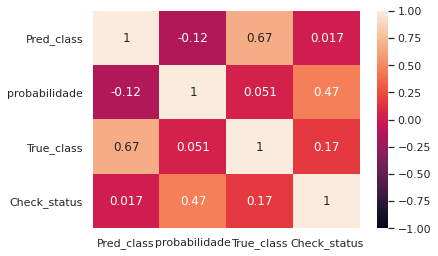

In [21]:
#Verificando se as features tem correlação
sns.heatmap(q3_df.corr(), vmin=-1, vmax=1, annot=True)
sns.set(font_scale=1.2)

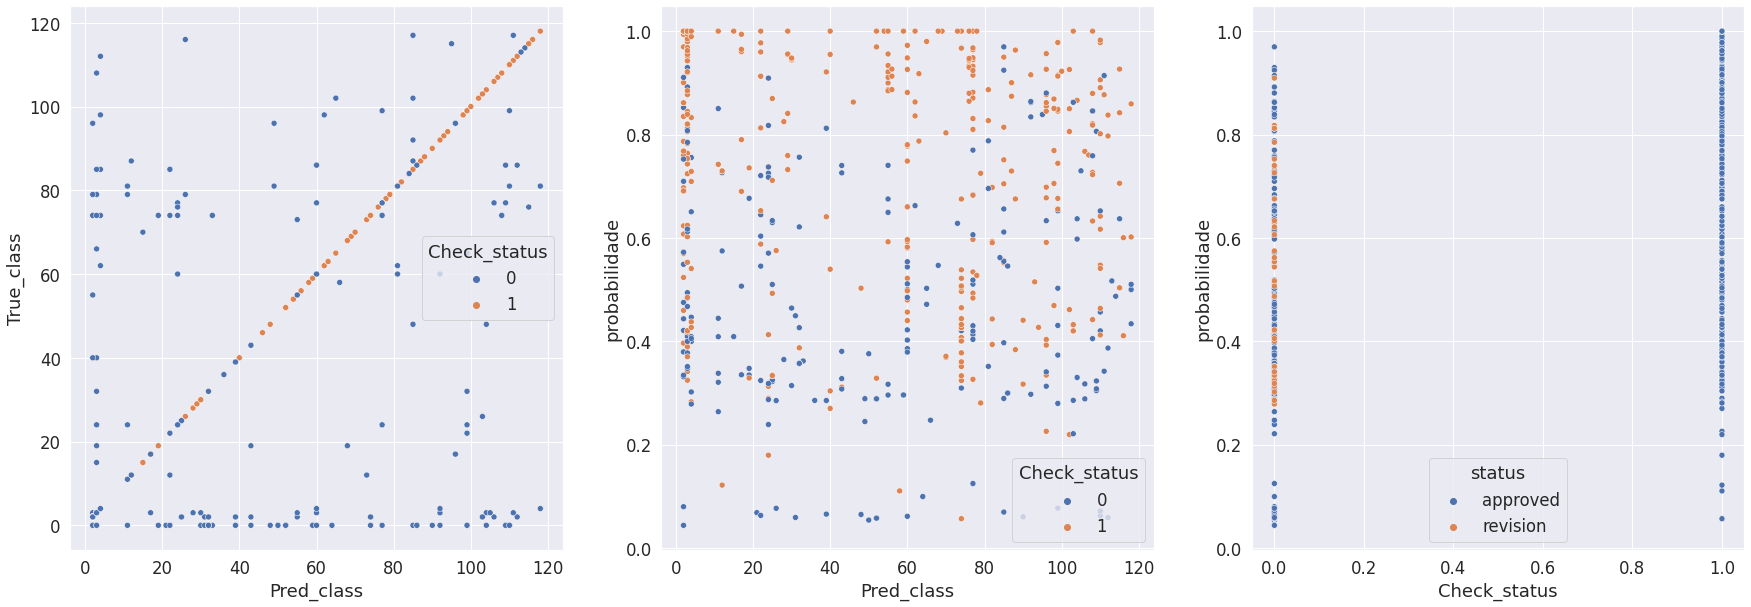

In [28]:
#Verificando a dispersão das amostras
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10)) 
sns.scatterplot(data=q3_df, x="Pred_class", y="True_class", hue="Check_status", ax=axs[0])
sns.scatterplot(data=q3_df, x="Pred_class", y="probabilidade", hue="Check_status", ax=axs[1])
sns.scatterplot(data=q3_df, x="Check_status", y="probabilidade", hue="status", ax=axs[2])
sns.set(font_scale=1.5)

Para treinar o modelo será necessário aplicar a técnica one-hot enconding na variável categórica (status), que basicamente consiste em transformar a coluna categórica em númerica

In [29]:
#Aplica a técnica one-hot enconding na variável categórica (status)
q3_df = pd.get_dummies(q3_df, prefix=["status"])
q3_df.head()

,Pred_class,probabilidade,True_class,Check_status,status_approved,status_revision
0,2,0.079892,0,0,1,0
1,2,0.379377,74,0,1,0
2,2,0.379377,74,0,1,0
3,2,0.420930,74,0,1,0
4,2,0.607437,2,1,1,0


Será treinado o modelo classificador com o algoritmo KNN, aplicando a técnica de validação cruzada k Fold.

In [33]:
#Para obtermos somente as variáveis preditoras, será necessário apagar a coluna target do dataset
X = q3_df.drop(columns=["Check_status"])

#Selecionamos somente a coluna target
y = q3_df.iloc[:, 3]

#A técnica K Fold consiste em dividir o dataset em K partes (K-1 para treinamento 1 para teste).
kf = KFold(n_splits=3, shuffle=True)

#Cria o modelo tipo KNN
clf = KNeighborsClassifier(n_neighbors=3)

scores = defaultdict(list)

#O treinamento e o teste serão realizados K vezes
for train_index, test_index in kf.split(X):  
  #Treina o modelo KNN
  clf.fit(X.loc[train_index], y.loc[train_index])
  #Realiza a predição
  y_pred = clf.predict(X.loc[test_index])
  #Armazena as métricas de avaliação do modelo para comentários na questão 4
  scores["accuracy"].append(accuracy_score(y[test_index], y_pred))
  scores["precision"].append(precision_score(y[test_index], y_pred))
  scores["recall"].append(recall_score(y[test_index], y_pred))
  scores["f-1"].append(f1_score(y[test_index], y_pred))
  
print("Acurácia média do modelo: {:.2f}".format(np.mean(scores["accuracy"])))

Acurácia média do modelo: 0.94


# Questão 4

4.1 Com base nos resultados da questão 3, será feita a análise das métricas de avaliação.


In [34]:
print("Acurácia média do modelo: {:.2f}".format(np.mean(scores["accuracy"])))
print("Precisão média do modelo: {:.2f}".format(np.mean(scores["precision"])))
print("Recall médio do modelo: {:.2f}".format(np.mean(scores["recall"])))
print("F-1 médio do modelo: {:.2f}".format(np.mean(scores["f-1"])))

Acurácia média do modelo: 0.94
Precisão média do modelo: 0.91
Recall médio do modelo: 1.00
F-1 médio do modelo: 0.95


1.   A acurácia traz a quantidade de predições que o modelo acertou. Neste caso, o modelo teve um excelente resultado.
2.   A precisão é a habilidade do modelo em não classificar uma amostra como positiva sendo negativa. A fórmula é simples: Verdadeiro Positivo / (Verdadeiro Positivo + Falso Positivo)
1.   O Recall é a habilidade do modelo encontrar todos as amostras positivas, a fórmula: Verdadeiro Positivo / (Verdadeiro Positivo + Falso Negativo)
2.   O modelo teve excelente resultados nas métricas de Precision e Recall.
1.   A métrica F1 pode ser considerada como uma média ponderada dos valores de recall e precision.

# Questão 5

5.1 Pré-processamento dos dados:
*   Transformar as sentencas em tokens;
*   Remover stop words;
*   Remover pontuações; 
*   Converter todas as palavras para minusculo;
*   Extrair o radical das palavras (lematização).

In [35]:
def pre_processing(sentences, classes):

  stop_words = set(stopwords.words('english'))

  lemmatizer = WordNetLemmatizer()

  new_sentences = []
  
  for sentence, classe in zip(sentences, classes):
    words = [w.lower() for w in wordpunct_tokenize(sentence) if w.isalpha() and len(w) > 1 and w.lower() not in stop_words]
    words = [lemmatizer.lemmatize(w, pos='v') for w in words]
    new_sentences.append((words, classe))
    
  return new_sentences  

5.2  Criar a tabela de frequência para passar como parâmetro para o algoritmo Naive Bayes. Foram criados dois métodos ( get_all_words e extract_features) para realizar esta tarefa.

In [36]:
def get_all_words(sentences):

  all_words = []

  for sentence, classe in sentences:
    all_words.extend(sentence)

  return set(all_words)    

In [37]:
def extract_features(sentence):

  features = { }

  freq = nltk.FreqDist(sentence)  

  for word in all_words:    
    features[word] = freq[word] if word in sentence else 0

  return features  

5.3 Execução do algoritmo de predição (Naive Bayes) e a indicação da acurácia do modelo.

In [38]:
#Leitura do arquivo excel
q5_df = pd.read_excel('teste_smarkio_lbs.xls', sheet_name="NLP")

#Realização do pré-processamento dos dados
sentences = pre_processing(q5_df['letra'], q5_df['artista'])

#Criação da tabela de frequência
all_words = get_all_words(sentences)
features = nltk.classify.apply_features(extract_features, sentences)

# Divisão da base de dados em treinamento (70%) e teste (30%)
samples = random.sample(list(features), len(features))
training_size = int(len(features) * 0.7)
training_set = samples[:training_size]
testing_set = samples[training_size:]

#Treinamento do modelo
classifier = nltk.NaiveBayesClassifier.train(training_set)

print("Acurácia do modelo NLP: {:.2f}".format(nltk.classify.accuracy(classifier, testing_set)))

Acurácia do modelo NLP: 0.65
